In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
# load data
data2 = pd.read_csv("HousePrice.csv")
data2.head() 

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


update dollar price to july 2023:

In [3]:
# Price(USD)_2023 = Price(USD) * (30000/ 49000)
data2["Price(USD)_2023"] =data2["Price(USD)"].multiply(30000/49000).round(decimals=0)
data2.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Price(USD)_2023
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67,37755.0
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67,37755.0
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33,11224.0
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33,18418.0
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33,142857.0


In [4]:
data = pd.read_csv("HousePrice.csv")

five most expensive houses:

In [5]:
five_most_expensive = data.sort_values(by=['Price'], ascending=False)
five_most_expensive[:5]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1612,420,4,True,True,True,Zaferanieh,9.240000e+10,3080000.00
1711,705,5,True,True,False,Abazar,9.100000e+10,3033333.33
406,400,5,True,True,False,Lavasan,8.500000e+10,2833333.33
773,680,5,True,True,False,Ekhtiarieh,8.160000e+10,2720000.00
1254,350,4,True,True,True,Niavaran,8.050000e+10,2683333.33


In [6]:
data.drop(["Address"], axis=1, inplace=True)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,63,1,True,True,True,1.850000e+09,61666.67
1,60,1,True,True,True,1.850000e+09,61666.67
2,79,2,True,True,True,5.500000e+08,18333.33
3,95,2,True,True,True,9.025000e+08,30083.33
4,123,2,True,True,True,7.000000e+09,233333.33


In [7]:
data.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.670137,0.199765,0.073080,0.047987,0.720990,0.720990
Room,0.670137,1.000000,0.279249,0.126244,0.183216,0.569476,0.569476
Parking,0.199765,0.279249,1.000000,0.428073,0.429527,0.192993,0.192993
Warehouse,0.073080,0.126244,0.428073,1.000000,0.204242,0.109675,0.109675
Elevator,0.047987,0.183216,0.429527,0.204242,1.000000,0.110417,0.110417
Price,0.720990,0.569476,0.192993,0.109675,0.110417,1.000000,1.000000
Price(USD),0.720990,0.569476,0.192993,0.109675,0.110417,1.000000,1.000000


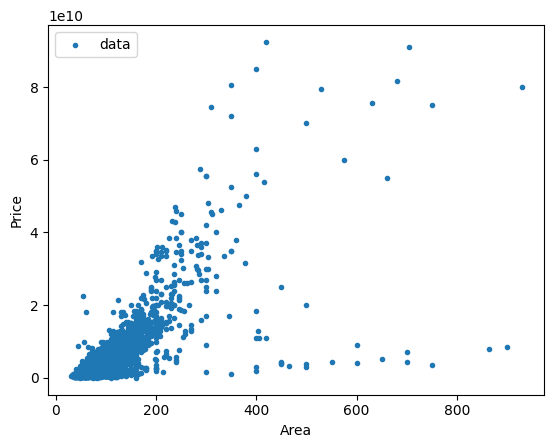

In [8]:
plt.scatter(data['Area'], data['Price'], marker='.')
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend(['data'], loc='upper left')
plt.show()

In [9]:
X = np.array(data[['Area']])
Y = np.array(data[['Price']])

print(X.shape)
print(Y.shape)

(3265, 1)
(3265, 1)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2448, 1)
(2448, 1)
(817, 1)
(817, 1)


LLS (Linear Least Squares):

In [11]:
from lls import LinearLeastSquares

In [12]:
lls = LinearLeastSquares()

lls.fit(X_train, Y_train)

Y_pred = lls.predict(X_test)

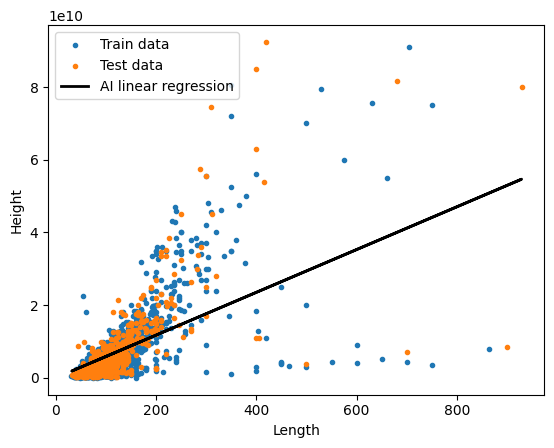

In [13]:
plt.scatter(X_train, Y_train, marker='.')
plt.scatter(X_test, Y_test, marker='.')
plt.plot(X_test, Y_pred, color='black', lw=2)

plt.xlabel('Length')
plt.ylabel('Height')
plt.legend(['Train data', 'Test data', 'AI linear regression'], loc='upper left')
plt.show()

In [14]:
lls.evaluate(X_test, Y_test, "mae")

3611864570.6193027

In [15]:
lls.evaluate(X_test, Y_test, "mse")

4.691324084308178e+19

In [16]:
lls.evaluate(X_test, Y_test, "rmse")

6849324115.78557

compare results with Scikit-Learn's:

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV  # Linear least squares with l2 regularization

In [18]:
lls= LinearRegression()
lls.fit(X_train,Y_train)

LinearRegression()

In [19]:
Y_pred = lls.predict(X_test)

In [20]:
import sklearn.metrics as metrics
# loss
mae = metrics.mean_absolute_error(Y_pred, Y_test)
mse = metrics.mean_squared_error(Y_pred, Y_test)
rmse = np.sqrt(metrics.mean_squared_error(Y_pred, Y_test))

In [21]:
print(f"MAE metric: {mae}")
print(f"MSE metric: {mse}")
print(f"RMSE metric: {rmse}")

MAE metric: 2862555479.9545355
MSE metric: 4.154420310923022e+19
RMSE metric: 6445479276.921944


In [22]:
lls= RidgeCV()
lls.fit(X_train,Y_train)

RidgeCV()

In [23]:
Y_pred = lls.predict(X_test)

In [24]:
# loss
mae = metrics.mean_absolute_error(Y_pred, Y_test)
mse = metrics.mean_squared_error(Y_pred, Y_test)
rmse = np.sqrt(metrics.mean_squared_error(Y_pred, Y_test))

In [25]:
print(f"MAE metric: {mae}")
print(f"MSE metric: {mse}")
print(f"RMSE metric: {rmse}")

MAE metric: 2862555981.396084
MSE metric: 4.154421125580362e+19
RMSE metric: 6445479908.882163
